In [8]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import matplotlib.patches as mpatches
import string
import cmasher as cmr

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
from matplotlib import rc
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

In [9]:
# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '7',
         'axes.labelsize': '7',
         'axes.titlesize': '7',
         'xtick.labelsize': '7',
         'ytick.labelsize': '7',
          
         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 10,
         'axes.labelpad': 15,
         
         'font.sans-serif':'Avenir',
         
         'axes.linewidth': 0.5,
         'xtick.major.width': 0.5,
         'ytick.major.width': 0.5}
pylab.rcParams.update(params)

In [10]:
# Custom Colors

darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

In [11]:
from extract_data_sep_power import get_data_sep_power
from extract_data_one_power import get_data_one_power
from extract_data_non_sep_power import get_data_non_sep_power

In [12]:
def cost_conts(ax, path, x_labels, colors):
    dic = {}
    solar_cost = np.empty(len(x_labels))
    wind_cost = np.empty(len(x_labels))
    batt_cost = np.empty(len(x_labels))
    storage_x_cost = np.empty(len(x_labels))
    pgp_cost = np.empty(len(x_labels))
    
    for i, x_label in enumerate(x_labels):
        print(path)
        print(x_label)
        if x_label == '':
            solar_cost[i] = 0
            wind_cost[i] = 0
            pgp_cost[i] = 0
            storage_x_cost[i] = 0
            batt_cost[i] = 0
            continue
        elif x_label == 'Metal-Air_100h':
            dic[x_label] = get_data_non_sep_power(path + '/' + x_label, 2, 'fixed_cost', 3, 'fixed_cost', False)
        elif x_label == 'CAES':
            dic[x_label] = get_data_sep_power(path + '/' + x_label, 2, 'fixed_cost', 3, 'fixed_cost', False)
        else:
            dic[x_label] = get_data_one_power(path + '/' + x_label, 2, 'fixed_cost', 3, 'fixed_cost', False)
    
        print(dic[x_label]['third_tech_cost'][0])
        
        solar_cost[i] = dic[x_label]['solar_cost'][0]
        wind_cost[i] = dic[x_label]['wind_cost'][0]
        pgp_cost[i] = dic[x_label]['pgp_cost'][0]
        storage_x_cost[i] = dic[x_label]['third_tech_cost'][0]
        batt_cost[i] = dic[x_label]['batt_cost'][0]
    
    w=0.8
    ax.bar(x_labels, solar_cost, label='Solar', color=yellow, width=w)
    ax.bar(x_labels, wind_cost, bottom=solar_cost, label='Wind', color='cornflowerblue', width=w)
    ax.bar(x_labels, pgp_cost, bottom=solar_cost+wind_cost, label='Hydrogen', color=pink, width=w)
    ax.bar(x_labels, storage_x_cost, bottom=solar_cost+wind_cost+pgp_cost, label='Storage X', color=colors, width=w)
    ax.bar(x_labels, batt_cost, bottom=solar_cost+wind_cost+pgp_cost+storage_x_cost, label='Li-ion', color=purple, width=w)
    
    plt.xticks(rotation=90)   

C:\Users\Anna\AppData\Local\Temp\ipykernel_19980\1300182185.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', 'RFB', 'PSH', 'Graviy', 'Thermal', 'CAES', 'Metal-Air'])
C:\Users\Anna\AppData\Local\Temp\ipykernel_19980\1300182185.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Li-ion', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])


C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X

C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
RFB
0.03842002532078542
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
PSH
0.03134631460005338
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
Gravitational
0.029659403516931457
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
Thermal
0.025240682102730668
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
CAES
0.020508163926064374
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\One_Tech_X
Metal-Air_100h
0.010217871825924776
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_Li-ion_X
Li-ion
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_Li-ion_X
RFB
0.030673923920986508
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_Li-ion_X
PSH
0.022958341135465507
C:\Users\Anna\Documents\MEM-mast

C:\Users\Anna\AppData\Local\Temp\ipykernel_19980\1300182185.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([r'H$_{\rm 2}$', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])


C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
PGP
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
RFB
0.0005025233185700913
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
PSH
0.0009154395979049008
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
Gravitational
0.002749598911731809
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
Thermal
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
CAES
0.0034583671069015596
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Two_Techs_PGP_X
Metal-Air_100h
0.007151821877708493
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
Li-ion_PGP
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
RFB
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
PSH
0
C:\Users\Anna\Document

C:\Users\Anna\AppData\Local\Temp\ipykernel_19980\1300182185.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['Li-ion + ' + r'H$_{\rm 2}$', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])


0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
Thermal
0
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
CAES
0.0031066250449566513
C:\Users\Anna\Documents\MEM-master\Output_Data\Mid_Duration\Three_Techs_Li-ion_PGP_X
Metal-Air_100h
0.007122007137533925


Text(-0.15, 1.15, 'D')

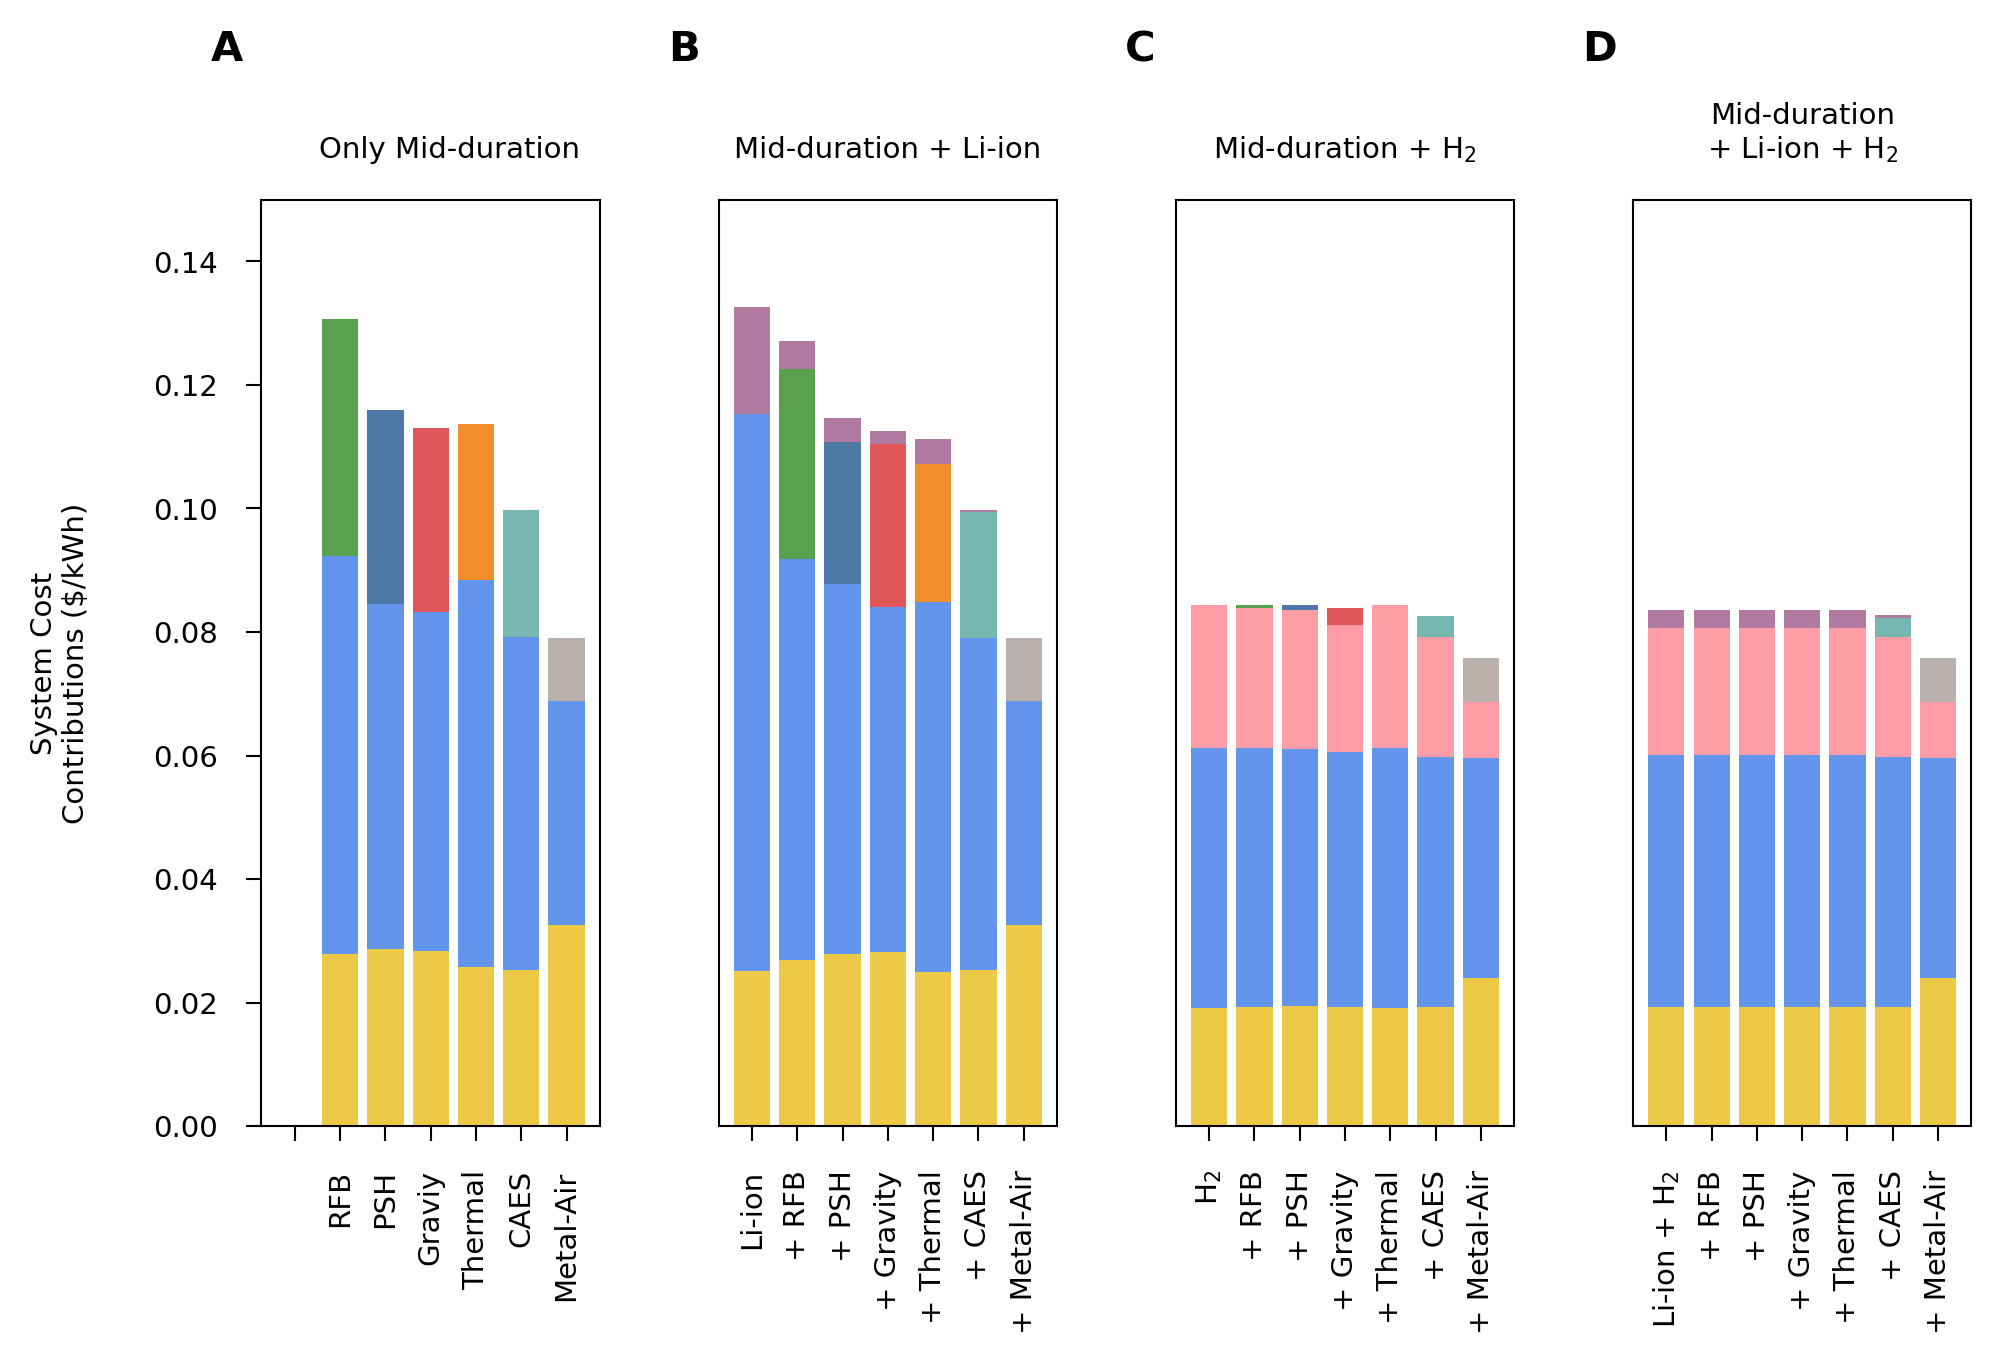

In [20]:
Li_ion_PGP_X_directory = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\Three_Techs_Li-ion_PGP_X'
PGP_X_directory = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\Two_Techs_PGP_X'
Li_ion_X_directory = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\Two_Techs_Li-ion_X'

# Set up techs
storage_colors= [purple, green, darkblue, red, orange, lightblue, gray, pink]

Li_ion_PGP_X_techs = ['Li-ion_PGP', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air_100h']
PGP_X_techs = ['PGP', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air_100h']
Li_ion_X_techs = ['Li-ion', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air_100h']

storage_x_colors = ['white', green, darkblue, red, orange, lightblue, gray]

# Just Storage X

X_directory = 'C:\\Users\\Anna\\Documents\\MEM-master\\Output_Data\\Mid_Duration\\One_Tech_X'
X_techs = ['', 'RFB', 'PSH', 'Gravitational', 'Thermal', 'CAES', 'Metal-Air_100h']

# Plot Figure

mm = 1/25.4 # millimeters in inches
fig_w = 172*mm
fig_h = 112*mm
fig = plt.subplots(nrows=1,ncols=2, figsize=(fig_w,fig_h), dpi=300)

########################################################################################
#         Li-ion + PGP + X : Cost Contributions of Different Storage X Techs           #
########################################################################################

ax1 = plt.subplot2grid((1, 4), (0, 0), colspan=1, rowspan=1)

ax1.set_title('    Only Mid-duration')
ax1.set_ylabel('System Cost\nContributions ($/kWh)')
ax1.set_xticklabels(['', 'RFB', 'PSH', 'Graviy', 'Thermal', 'CAES', 'Metal-Air'])
cost_conts(ax1, X_directory, X_techs, storage_x_colors)

###############################################################################
#         PGP + X : Cost Contributions of Different Storage X Techs           #
###############################################################################

ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=1, rowspan=1)

ax2.set_title('Mid-duration + Li-ion')
ax2.set_xticklabels(['Li-ion', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])
cost_conts(ax2, Li_ion_X_directory, Li_ion_X_techs, storage_x_colors)

####################################################################################
#         Li-ion + X: Cost Contributions of Different Storage X Techs           #
####################################################################################

ax3 = plt.subplot2grid((1, 4), (0, 2), colspan=1, rowspan=1, )

ax3.set_title('Mid-duration + ' + r'H$_{\rm 2}$')
ax3.set_xticklabels([r'H$_{\rm 2}$', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])
cost_conts(ax3, PGP_X_directory, PGP_X_techs, storage_x_colors)
  
####################################################################################
#        X: Cost Contributions of Different Storage X Techs           #
####################################################################################

ax4 = plt.subplot2grid((1, 4), (0, 3), colspan=1, rowspan=1)

ax4.set_title('Mid-duration\n+ Li-ion + ' + r'H$_{\rm 2}$')
ax4.set_xticklabels(['Li-ion + ' + r'H$_{\rm 2}$', '+ RFB', '+ PSH', '+ Gravity', '+ Thermal', '+ CAES', '+ Metal-Air'])
cost_conts(ax4, Li_ion_PGP_X_directory, Li_ion_PGP_X_techs,  storage_x_colors)
  
#####################################################################

# Set x and y lims

ymax = 0.15
ax1.set_ylim(0, ymax)
ax2.set_ylim(0, ymax)
ax3.set_ylim(0, ymax)
ax4.set_ylim(0, ymax)

#####################################################################

#ax1.set_box_aspect(1)
#ax2.set_box_aspect(1)
#ax3.set_box_aspect(1)

ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.35, hspace=0.25)

ax1.text(-0.15, 1.15, 'A', transform=ax1.transAxes, fontsize=10, fontweight='bold')
ax2.text(-0.15, 1.15, 'B', transform=ax2.transAxes, fontsize=10, fontweight='bold')
ax3.text(-0.15, 1.15, 'C', transform=ax3.transAxes, fontsize=10, fontweight='bold')
ax4.text(-0.15, 1.15, 'D', transform=ax4.transAxes, fontsize=10, fontweight='bold')

NameError: name 'Li_ion_PGP_X_dataframes' is not defined

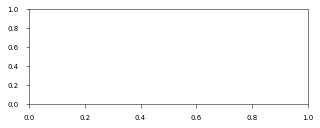

In [7]:
fig = plt.figure(figsize=(5, 1.75))
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
cost_conts(ax, Li_ion_PGP_X_directory, Li_ion_PGP_X_techs, Li_ion_PGP_X_dataframes)
ax.tick_params(axis='both', which='major', labelsize=13, pad=5)
ax.set_xticks([])
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(0.074, 0.085)

In [ ]:
fig = plt.figure(figsize=(5, 1.75))
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
cost_conts(ax, PGP_X_directory, PGP_X_techs, PGP_X_dataframes)
ax.tick_params(axis='both', which='major', labelsize=13, pad=5)
ax.set_xticks([])
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(0.074, 0.085)

In [ ]:
df1 = dataframes['PGP']
df2 = dataframes['RFB']
df3 = dataframes['PSH']
df4 = dataframes['Gravitational']
df5 = dataframes['Thermal']
df6 = dataframes['CAES']
df7 = dataframes['Metal-Air']
pd.concat([df1.set_index(df6.index), df2.set_index(df6.index), 
           df3.set_index(df6.index), df4.set_index(df6.index),
           df5.set_index(df6.index), df6.set_index(df6.index),
           df7.set_index(df6.index)], axis=1)